Cosc222103004 Muhammad Mukhtar

Project Object detection Using Yolo

Installing ultralytic library for  object detection

In [ ]:
!pip install -U ultralytics

Importing important libraries to use in object detection

In [10]:
import torch
import torchvision
import cv2
import random
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

Loading  Yolov5s

In [11]:
# loading the pre-trained yolov5 model from pytorch
yolov5 = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True)

Using cache found in C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-14 Python-3.11.1 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [12]:
test_img_path = "pictures/1478019958179775471.jpg"

Using yolo model and printing the result of object detection 

In [13]:
detected_results = yolov5(test_img_path)
detected_results.print()

C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 300x480 2 cars, 1 truck
Speed: 19.2ms pre-process, 186.2ms inference, 2.0ms NMS per image at shape (1, 3, 416, 640)


Object detection on test img

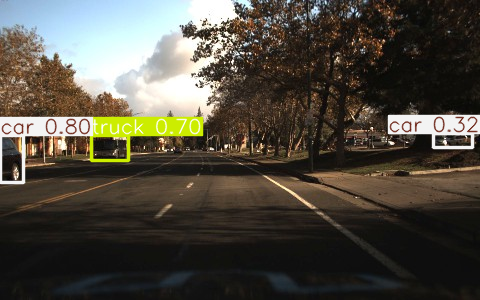

In [14]:
detected_results.show()

Creating  dataframe of result of object detection in  above img 

In [15]:
resultyolov5s_df = detected_results.pandas().xyxy[0] 
resultyolov5s_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.151491,135.245728,23.855782,182.555054,0.797482,2,car
1,91.040840,135.551010,128.443405,160.735260,0.698054,7,truck
2,433.844055,133.333313,472.839203,147.996857,0.320635,2,car


Now Loading Yolov5l 

In [16]:
# this time I want to choose tolov5l to see how this one works 
yolov5l = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)


Using cache found in C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-14 Python-3.11.1 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 


In [17]:
# passing the test image to yolov5l
detectedyolov5l_img_result = yolov5l(test_img_path)

C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [18]:
# printing the results
detectedyolov5l_img_result.print()

image 1/1: 300x480 5 cars, 1 bus
Speed: 8.7ms pre-process, 572.3ms inference, 0.0ms NMS per image at shape (1, 3, 416, 640)


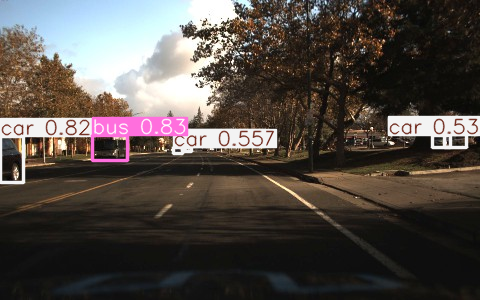

Saved 1 image to runs\detect\exp13


In [19]:
detectedyolov5l_img_result.show()
#if want to save the img used below code
detectedyolov5l_img_result.save() 

In [20]:
result_yolov5l_df = detectedyolov5l_img_result.pandas().xyxy[0] 
result_yolov5l_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,92.492165,135.459686,127.247025,160.629868,0.834217,5,bus
1,0.204164,136.517792,23.525080,182.743561,0.823587,2,car
2,173.351517,147.086105,182.031738,153.840729,0.547005,2,car
3,432.966644,135.540176,450.648499,147.972214,0.531340,2,car
4,444.722656,134.574280,466.759857,147.866104,0.426044,2,car
5,184.618973,147.166245,191.074722,151.133926,0.271017,2,car


In [21]:
img_list=["pictures/1478019953689774621.jpg","000000018380.jpg",
"000000001000.jpg","000000038829.jpg"]

In [22]:
# passing the img_list to the model 
detectedyolov5l_img_list_result = yolov5l(img_list)

C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [23]:
# printing the results of img_list
detectedyolov5l_img_list_result.print()

image 1/4: 300x480 3 cars
image 2/4: 426x640 18 persons, 1 bottle, 5 wine glasss, 16 cups, 7 forks, 1 knife, 1 spoon, 3 bowls, 1 carrot, 2 chairs, 1 dining table, 1 vase
image 3/4: 480x640 12 persons, 1 handbag, 1 baseball glove, 4 tennis rackets, 1 bottle
image 4/4: 427x640 5 persons, 1 bicycle, 4 motorcycles
Speed: 17.6ms pre-process, 775.5ms inference, 0.0ms NMS per image at shape (4, 3, 480, 640)


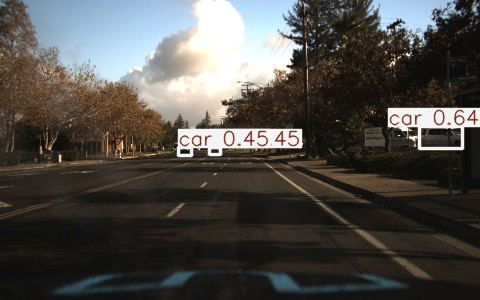

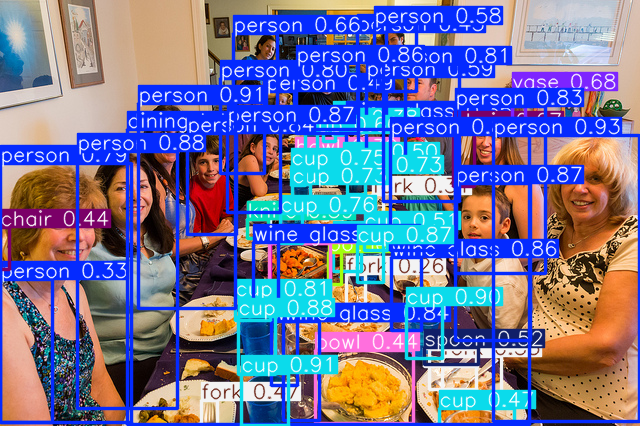

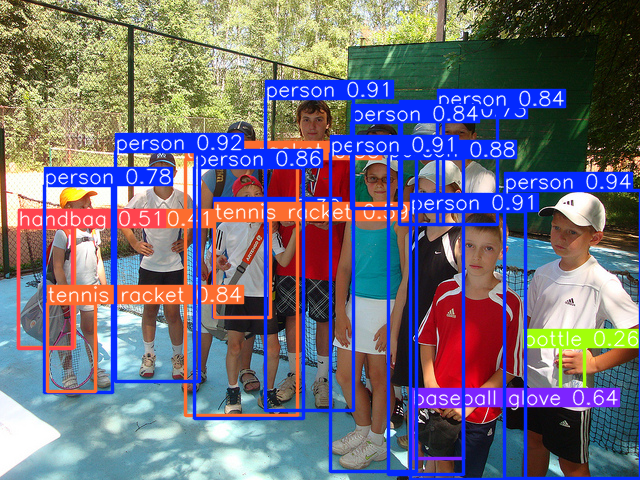

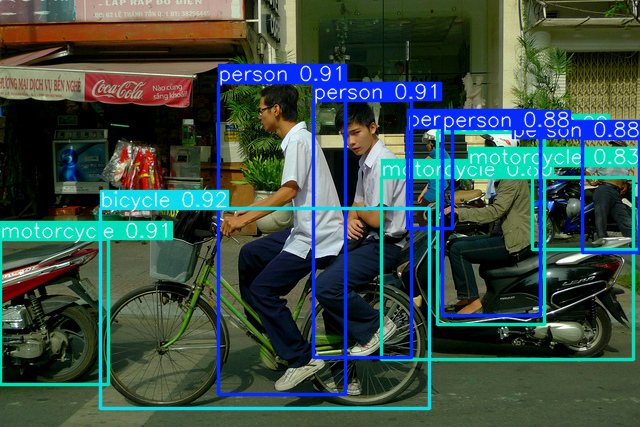

Saved 4 images to runs\detect\exp14


In [24]:
detectedyolov5l_img_list_result.show()
detectedyolov5l_img_list_result.save() 

Now going to try yolov8n

In [25]:
from ultralytics import YOLO

yolov8n = YOLO("yolov8n.pt")  # Replace 'yolov8n.pt' with the desired model size

In [26]:
# passing the test image to yolov8n
detectedyolov8n_img_result = yolov8n(test_img_path)



image 1/1 c:\Users\HP\Downloads\CV\pictures\1478019958179775471.jpg: 416x640 2 cars, 1 bus, 1 truck, 147.0ms
Speed: 0.0ms preprocess, 147.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


In [27]:
img_list=["pictures/1478019953689774621.jpg","pictures/1478019957180061202.jpg",
"pictures/1478019957687018435.jpg","pictures/1478020858718778979.jpg","pictures/1478020864213358079.jpg","pictures/1478732207403043218.jpg","pictures/1478732565830502735.jpg"]

In [28]:
detectedyolov8n_img_list_result = yolov8n(img_list)


0: 416x640 1 car, 79.8ms
1: 416x640 1 car, 79.8ms
2: 416x640 2 cars, 1 truck, 79.8ms
3: 416x640 3 cars, 79.8ms
4: 416x640 2 cars, 79.8ms
5: 416x640 4 cars, 1 truck, 9 traffic lights, 79.8ms
6: 416x640 10 cars, 79.8ms
Speed: 4.2ms preprocess, 79.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


In [29]:
# Load and predict on an image
image_path = "cars.jpg"  # Replace with your image path
results = yolov8n(image_path)



image 1/1 c:\Users\HP\Downloads\CV\cars.jpg: 480x640 9 cars, 2 buss, 1 truck, 143.4ms
Speed: 7.8ms preprocess, 143.4ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


In [30]:
# Plot results
annotated_image = results[0].plot()  # Plot the predictions on the image

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Now to make wafer file of object detection yolov8n model 

In [23]:

# Save annotated image using Matplotlib
output_path = "annotated_cars.jpg"
plt.imsave(output_path, cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
print(f"Annotated image saved to {output_path}")


Annotated image saved to annotated_cars.jpg


Real time object detection through webcam

In [2]:
import cv2
from ultralytics import YOLO
import os
from datetime import datetime

# Load the YOLOv8 model (you can use yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8n.pt")

# Open a connection to the webcam (use 0 for default webcam or the index of another camera)
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Create a directory to save images
save_dir = "detected_frames"
os.makedirs(save_dir, exist_ok=True)

print(f"Press 's' to save frames with detections or 'q' to quit.")

# Loop to process video frames
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    # Run YOLOv8 model on the frame
    results = model.predict(frame, conf=0.5, show=False)

    # Annotate the frame with the results
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow("YOLOv8 Real-Time Object Detection", annotated_frame)

    # Check for key presses
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # Quit if 'q' is pressed
        break
    elif key == ord('s'):  # Save frame if 's' is pressed
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        file_path = os.path.join(save_dir, f"detection_{timestamp}.jpg")
        cv2.imwrite(file_path, annotated_frame)
        print(f"Frame saved: {file_path}")

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


Press 's' to save frames with detections or 'q' to quit.

0: 480x640 (no detections), 255.5ms
Speed: 9.3ms preprocess, 255.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 363.9ms
Speed: 9.5ms preprocess, 363.9ms inference, 5.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 331.7ms
Speed: 7.0ms preprocess, 331.7ms inference, 6.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 324.2ms
Speed: 16.7ms preprocess, 324.2ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 279.2ms
Speed: 11.3ms preprocess, 279.2ms inference, 7.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 235.9ms
Speed: 6.1ms preprocess, 235.9ms inference, 7.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 269.9ms
Speed: 9.1ms preprocess, 269.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 217.2ms
S

Now converting the img to dataframe

In [5]:
import pandas as pd
 # Create a list to store image statistics
image_stats = []
 # Extract statistics for the current frame
detections = results[0].boxes
num_detections = len(detections)  # Number of detections
class_ids = detections.cls.tolist() if num_detections > 0 else []  # Class IDs
class_names = [model.names[int(cls)] for cls in class_ids]  # Convert to class names
unique_classes = list(set(class_names))  # Unique class names
confidences = detections.conf.tolist() if num_detections > 0 else []  # Confidence scores
avg_confidence = sum(confidences) / len(confidences) if confidences else 0  # Average confidence

        # Append stats to the list
image_stats.append({
            "image_name": f"detection_{timestamp}.jpg",
            "num_detections": num_detections,
            "unique_classes": unique_classes,
            "avg_confidence": avg_confidence
        })

print(f"Frame saved: {file_path}")
print(f"Statistics: {image_stats[-1]}")

# Convert statistics to a dataframe
df_stats = pd.DataFrame(image_stats)

# Save the dataframe to a CSV file
stats_csv = os.path.join(save_dir, "image_statistics.csv")
df_stats.to_csv(stats_csv, index=False)

print(f"\nImage statistics saved to: {stats_csv}")
print(df_stats)

Frame saved: detected_frames\detection_20241215_133907.jpg
Statistics: {'image_name': 'detection_20241215_133907.jpg', 'num_detections': 1, 'unique_classes': ['person'], 'avg_confidence': 0.7171086668968201}

Image statistics saved to: detected_frames\image_statistics.csv
                      image_name  num_detections unique_classes  \
0  detection_20241215_133907.jpg               1       [person]   

   avg_confidence  
0        0.717109  
